In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, homogeneity_score, confusion_matrix, classification_report, roc_curve, auc


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [26]:
# Set random seed for reproducibility
np.random.seed(42)

In [27]:
# 1. Load and prepare data
df = pd.read_csv('../Preprocessing/balanced_ecg_data.csv')  # Your balanced dataset
print("Dataset Head:\n", df.head())

Dataset Head:
    Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0 -1.944044  1.891310  5.378017 -1.099764  0.319998 -0.107990  0.192998   
1  0.548890  3.689146 -1.079215 -1.125497  6.892610 -0.114086 -0.129833   
2  1.044743  2.804073 -1.779122 -0.358211  6.132624 -1.309396 -0.731316   
3 -2.848743 -2.220174 -0.498797 -0.054547  0.073406  0.927517  1.891807   
4 -0.715628  0.217362  2.032461 -0.144826  4.375660 -1.762026  1.335940   

   Feature8  Feature9  Feature10  ...  Feature21  Feature22  Feature23  \
0 -0.531588 -1.978358   0.505306  ...   0.435838  -0.375777  -2.410484   
1 -4.471123  1.281707   2.509007  ...  -0.515136  -1.814937  -0.659753   
2 -3.381683 -1.444734   3.028355  ...  -0.928873  -1.592203  -0.389953   
3 -0.381548  0.017551   0.659493  ...   0.662054   0.671306  -0.463003   
4  1.742721 -1.771379   0.819612  ...  -0.428352  -0.511074  -0.346423   

   Feature24  Feature25  Feature26  Feature27  Feature28  Feature29  target  
0   1.30730

In [28]:
df['target'].value_counts()

target
8     367
3     367
13    367
2     367
4     367
5     367
14    367
6     367
10    367
1     367
11    367
7     367
0     367
12    367
9     367
Name: count, dtype: int64

In [29]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [30]:
# ⚠️ Normalize data (DBSCAN is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# 🔥 Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune 'eps' and 'min_samples'
y_cluster = dbscan.fit_predict(X_scaled)  # Cluster labels (-1 = noise)

In [32]:
# 📊 Evaluate clustering (Adjusted Rand Index: ARI)
ari_score = adjusted_rand_score(y, y_cluster)
homogeneity = homogeneity_score(y, y_cluster)

In [33]:
print(f"ARI Score: {ari_score:.4f}")  # 1.0 = Perfect Clustering
print(f"Homogeneity Score: {homogeneity:.4f}")

ARI Score: 0.6962
Homogeneity Score: 0.9106


In [34]:
# 🏷️ Count noise points
num_noise = np.sum(y_cluster == -1)
print(f"Number of noise points: {num_noise}")

Number of noise points: 843


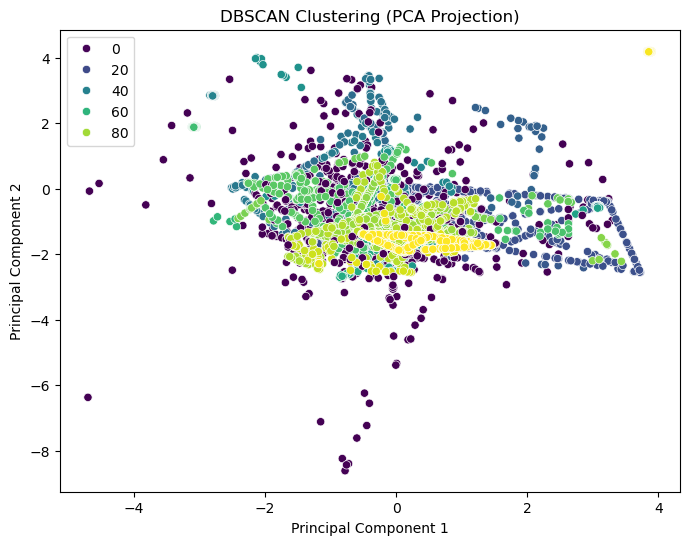

In [37]:
# 6️⃣ Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_cluster, palette='viridis')
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

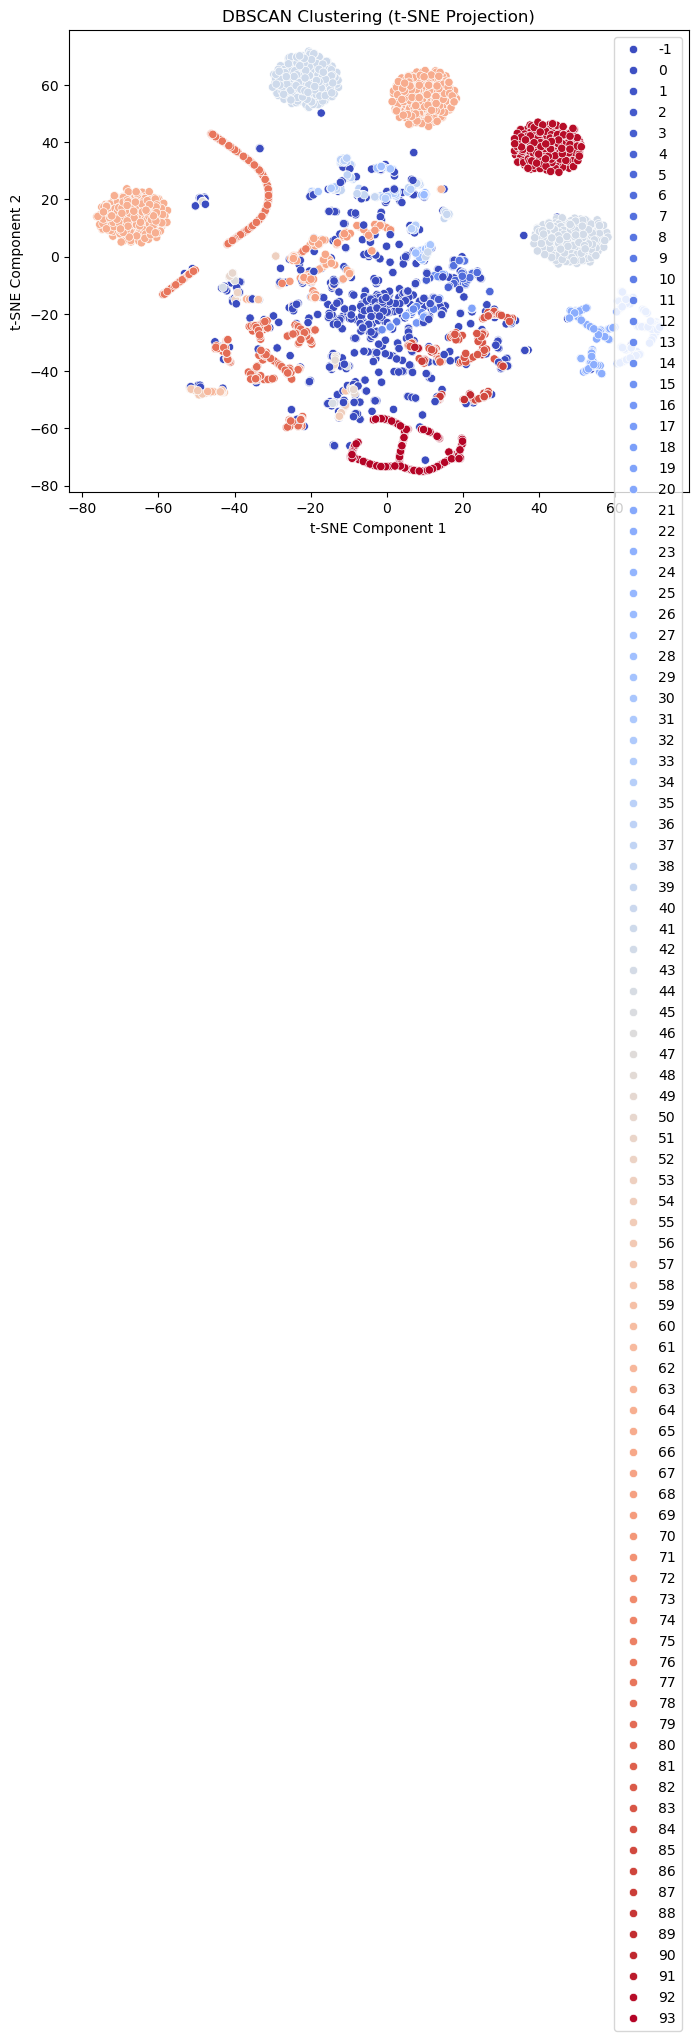

In [ ]:
# 7️⃣ Visualize Clusters using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_cluster, palette='coolwarm')
plt.title("DBSCAN Clustering (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()